Customer Churn Rate Analysis

In [21]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [22]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, recall_score, confusion_matrix, precision_score, f1_score, classification_report
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


In [23]:
df=pd.read_csv('/Users/shubhmehta/Desktop/programming/Data Science Projects/Telecom Customer Churn /WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [24]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
df.shape

(7043, 21)

In [27]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

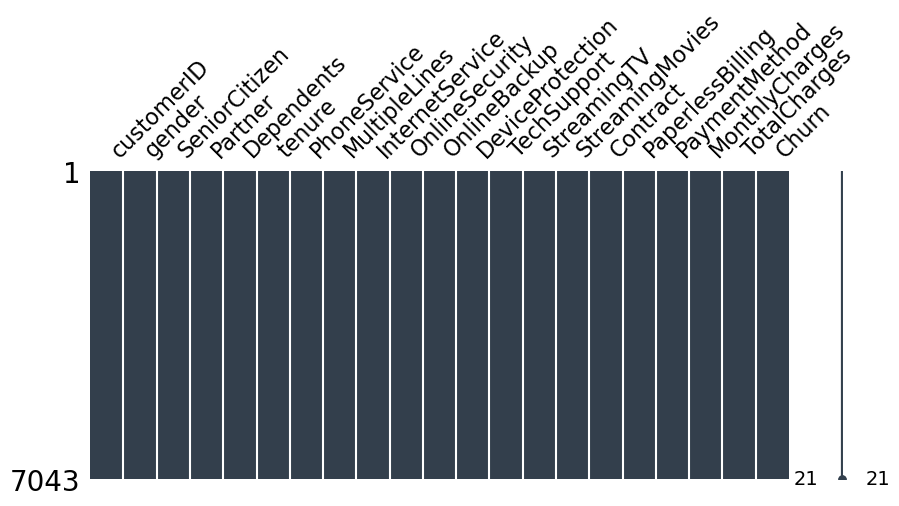

In [28]:
#Vizulising missing values 
msno.matrix(df, figsize=(10, 4), color=(0.20, 0.25, 0.30));

**Data Manipulation**

In [29]:
#Dropping the customerID column
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
# Converting TotalCharges to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Counting the number of null values in all the columns 
null_values= df.isnull().sum()
print(null_values)

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [31]:
#Creating boolean values for the column. Checking for rows with NaN values
df.loc[pd.isna(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [32]:
#Removing the rows with tenure as 0.
df = df[df['tenure'] != 0]

In [33]:
#handelling the missing values of TotalCharges by replacing them with the mean 
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [34]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [35]:
# Converting the numeric SeniorCitizen values to Yes/No
df["SeniorCitizen"] = df["SeniorCitizen"].map({0: "No", 1: "Yes"})

In [36]:
df["InternetService"].describe()

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [37]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


**Data Visualization**

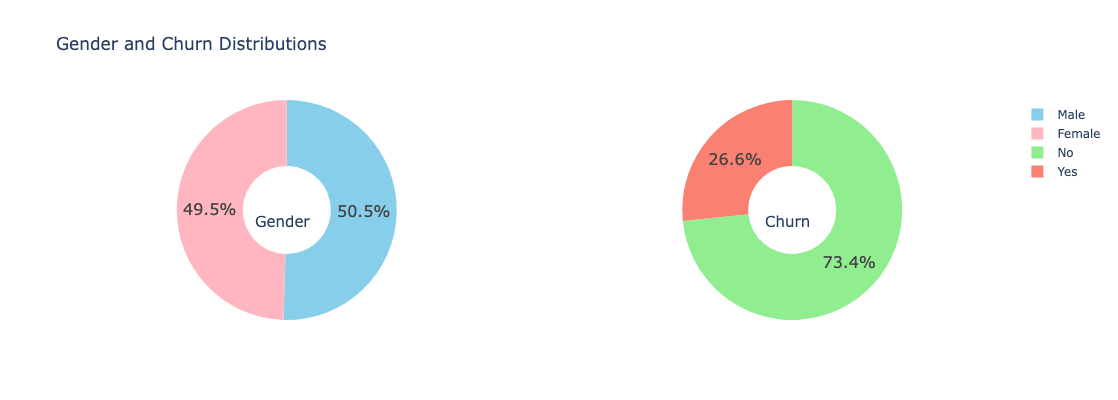

In [38]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Creating subplots 
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], 
                    subplot_titles=["Gender Distribution", "Churn Distribution"])

fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender",
                     marker_colors=['skyblue', 'lightpink']), 1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn",
                     marker_colors=['lightgreen', 'salmon']), 1, 2)

# Using `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)
fig.update_layout(
    title_text="Gender and Churn Distributions",
    width=800, height=400, 
    annotations=[dict(text='Gender', x=0.22, y=0.4, font_size=15, showarrow=False),
                 dict(text='Churn', x=0.77, y=0.4, font_size=15, showarrow=False)])
fig.show()

In [39]:
#Checking churn count for each gender
df.groupby(["gender", "Churn"]).size()

gender  Churn
Female  No       2544
        Yes       939
Male    No       2619
        Yes       930
dtype: int64

In [40]:
plt.figure(figsize=(10, 8))

# Labeling and inserting values for the main and gender-specific distributions
labels = ["Churn: Yes", "Churn: No"]
values = [1869, 5163]
labels_gender = ["Female: Yes", "Male: Yes", "Female: No", "Male: No"]
sizes_gender = [939, 930, 2544, 2619]

# Setting the colour schemas
colors = ['#ff9999', '#66b3ff']
colors_gender = ['#ffcc99', '#99ff99', '#c2e0f4', '#f6a6ff']

# Text properties for readability
textprops = {"fontsize": 12}

# Main Churn Distribution Pie Chart
plt.pie(values, labels=labels, autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2, colors=colors, startangle=90, frame=True, explode=explode, radius=2.7, textprops=textprops, counterclock=False)

# Gender-specific Distribution Pie Chart
plt.pie(sizes_gender, labels=labels_gender, colors=colors_gender, startangle=90, explode=explode_gender, radius=2.2, textprops=textprops, counterclock=False)

# Drawing a hole for a donut-like appearance
centre_circle = plt.Circle((0, 0), 1.5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Title
plt.title('Churn Distribution w.r.t Gender: Male (M), Female (F)', fontsize=15, y=1.05)

# Ensuring the pie chart is a circle 
plt.axis('equal')

plt.show()

NameError: name 'explode' is not defined

<Figure size 1000x800 with 0 Axes>

In [ ]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group",
                   title="<b>Customer Contract Distribution</b>",
                   color_discrete_sequence=px.colors.qualitative.Plotly)

# Updating layout to adjust figure size and bar gap
fig.update_layout(width=800, height=600, bargap=0.1)

fig.show()

In [ ]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

# Creating donut chart to visualize the distribution of Payment Methods
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, 
                             marker=dict(colors=['#636EFA', '#EF553B', '#00CC96', '#AB63FA']))])

# Updating the layout
fig.update_layout(
    title_text="<b>Payment Method Distribution</b>",
    width=800,  
    height=600
)

fig.show() 

In [ ]:
# Creating a histogram to visualize the distribution of customer churn based on payment method
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>",
                   color_discrete_sequence=px.colors.qualitative.Set2) 

# Updating the layout
fig.update_layout(width=800, height=600, bargap=0.05) # Adjusted figure size and reduced gap between bars for a tighter layout
fig.show()

In [ ]:
male_service_churn_counts = df[df["gender"] == "Male"][["InternetService", "Churn"]].value_counts()
print("Counts of Internet Service and Churn combinations for Males:\n", male_service_churn_counts)

female_service_churn_counts = df[df["gender"] == "Female"][["InternetService", "Churn"]].value_counts()
print("\nCounts of Internet Service and Churn combinations for Females:\n", female_service_churn_counts)

In [ ]:
fig = go.Figure()

# DSL Internet service distribution by gender and churn status
fig.add_trace(go.Bar(
    x=[['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
    y=[965, 992, 219, 240],
    name='DSL',
    marker_color='rgb(255, 99, 132)'  
))

# Fiber optic Internet service distribution by gender and churn status
fig.add_trace(go.Bar(
    x=[['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
    y=[889, 910, 664, 633],
    name='Fiber optic',
    marker_color='rgb(54, 162, 235)'  
))

# No Internet service distribution by gender and churn status
fig.add_trace(go.Bar(
    x=[['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
    y=[690, 717, 56, 57],
    name='No Internet',
    marker_color='rgb(255, 206, 86)'  
))

fig.update_layout(
    title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>",
    title_font_size=20,
    autosize=False,
    width=800,  
    height=600,
)

fig.show()


In [ ]:
color_map = {"Yes": "#1f77b4", "No": "#ff7f0e"}

# Creating a grouped histogram to show the distribution of Churn with respect to Dependents
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group",
                   title="<b>Dependents distribution among Churn</b>",
                   color_discrete_map=color_map)

fig.update_layout(width=800, height=600, bargap=0.2)

fig.show()

In [ ]:
color_map = {"Yes": '#007bff', "No": '#28a745'}  

# Creating grouped histogram to visualize Churn distribution with respect to having a Partner
fig = px.histogram(df, x="Churn", color="Partner", barmode="group",
                   title="<b>Churn Distribution w.r.t. Partners</b>",
                   color_discrete_map=color_map)

fig.update_layout(width=800, height=600, bargap=0.1)  

fig.show()

In [ ]:
color_map = {"Yes": 'darkorange', "No": 'lightblue'}

# Creating  histogram to visualize Churn distribution with respect to Senior Citizen status
fig = px.histogram(df, x="Churn", color="SeniorCitizen", barmode='group',
                   title="<b>Churn Distribution by Senior Citizen Status</b>",
                   color_discrete_map=color_map)

fig.update_layout(width=800, height=600, bargap=0.2, 
                  xaxis_title="Churn Status", 
                  yaxis_title="Count",
                  legend_title="Senior Citizen")

fig.show()

In [ ]:
color_map = {"Yes": "#1f77b4", "No": "#ff7f0e"}

# Creating histogram to visualize the churn distribution with respect to online security subscription
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group",
                   title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)

fig.update_layout(width=800, height=600, bargap=0.15) 

fig.show()

In [ ]:
color_map = {"Yes": 'LightSeaGreen', "No": 'Tomato'}

# Creating histogram to visualize the distribution of churn with respect to paperless billing
fig = px.histogram(df, 
                   x="Churn", 
                   color="PaperlessBilling", 
                   title="<b>Churn Distribution w.r.t. Paperless Billing</b>", 
                   color_discrete_map=color_map,
                   barmode='group')

fig.update_layout(width=900, height=600,  
                  bargap=0.2, 
                  title_font_size=20)

fig.show()

In [ ]:
# Creating a histogram to visualize the distribution of churn with respect to tech support availability
fig = px.histogram(df, x="Churn", color="TechSupport", barmode="group",
                   title="<b>Churn Distribution w.r.t. Tech Support</b>",
                   color_discrete_sequence=px.colors.qualitative.Pastel)  

fig.update_layout(width=800, height=600, bargap=0.05)

fig.show()

In [ ]:
color_map = {"Yes": 'crimson', "No": 'navy'}

# Creating histogram to visualize Churn distribution with respect to Phone Service
fig = px.histogram(df, x="Churn", color="PhoneService", barmode='group',
                   title="<b>Churn Distribution w.r.t. Phone Service</b>",
                   color_discrete_map=color_map)

fig.update_layout(width=800, height=600, bargap=0.2)

fig.show()

In [ ]:
sns.set_context("paper", font_scale=1.1)

plt.figure(figsize=(10, 6))

#Plotting the distribution of MonthlyCharges of customers who didn't churn
ax = sns.kdeplot(df.MonthlyCharges[df["Churn"] == 'No'], color="darkgreen", shade=True, label="Not Churn")

#Plotting the distribution of MonthlyCharges for customers who did churn
sns.kdeplot(df.MonthlyCharges[df["Churn"] == 'Yes'], color="darkorange", shade=True, label="Churn", ax=ax)

ax.legend(loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

In [ ]:
plt.figure(figsize=(10, 6))

#Plotting KDE for TotalCharges where there is no churn
sns.kdeplot(df.TotalCharges[df["Churn"] == 'No'], color="deepskyblue", shade=True, label="Not Churn")

# Plot KDE for TotalCharges where there is churn
sns.kdeplot(df.TotalCharges[df["Churn"] == 'Yes'], color="crimson", shade=True, label="Churn")

plt.legend(loc='upper right')
plt.ylabel('Density')
plt.xlabel('Total Charges')
plt.title('Distribution of Total Charges by Churn Status')

plt.show()

In [ ]:
#Creating box plot for analyze the relationship between Churn and Tenure
fig = px.box(df, x='Churn', y='tenure', color='Churn', 
             title='<b>Tenure vs Churn</b>',
             labels={'tenure': 'Tenure (Months)', 'Churn': 'Churn'})  

fig.update_layout(
    autosize=True,
    width=850,  # Updated size
    height=650,  # Updated size
    title_font=dict(size=25, family='Courier'),
    plot_bgcolor='lightgrey',  # Adding a background color for better contrast
    paper_bgcolor='lightgrey',  # Matching plot background for consistency
)

fig.show()

In [ ]:
plt.figure(figsize=(20, 8)) 

#Calculating the correlation matrix for categorical variables, first converting them to numerical codes
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

#Generating a mask for the upper triangle for a cleaner heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

#creating the heatmap
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns,
                 annot=True, linewidths=.5, cmap='viridis', vmin=-1, vmax=1)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.title('Correlation Heatmap of Categorical Variables')
plt.show()